<a href="https://colab.research.google.com/github/geraschenko/examples/blob/master/Padding_valid_vs_same_for_Conv2DTranspose_and_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import keras
import keras.backend as K
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

Using TensorFlow backend.


# Conv2DTranspose

In [2]:
inputs = keras.Input(shape=(10, 10, 1))

outputs = keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding='valid')(inputs)
valid_model = keras.Model(inputs, outputs)
print('padding valid:')
valid_model.summary()

outputs = keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding='same')(inputs)
same_model = keras.Model(inputs, outputs)
print('padding same:')
same_model.summary()

x = keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding='valid')(inputs)
outputs = keras.layers.Cropping2D(((0, 1), (0, 1)))(x)
my_model = keras.Model(inputs, outputs)
print('custom:')
my_model.summary()

model = valid_model

Instructions for updating:
Colocations handled automatically by placer.
padding valid:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 10, 1)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 21, 21, 1)         10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
padding same:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 10, 1)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 20, 20, 1)         10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________

In [3]:
train_images = np.random.random((1000,) + model.input_shape[1:])
train_labels = np.random.random((1000,) + model.output_shape[1:])

model.compile(loss=keras.losses.mean_squared_error, optimizer='adam')
model.fit(train_images, train_labels, epochs=1, batch_size=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3650


In [0]:
model.save_weights('/tmp/model.h5')
valid_model.load_weights('/tmp/model.h5')
same_model.load_weights('/tmp/model.h5')
my_model.load_weights('/tmp/model.h5')

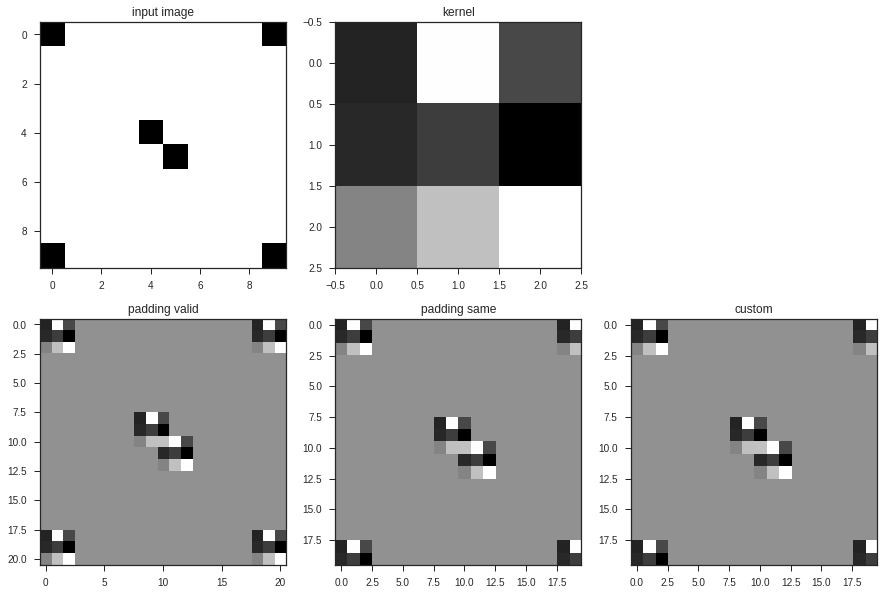

In [5]:
plt.figure(figsize=(15,10))
im = 0.0 * train_images[0, :, :, 0]
im[0, 0] = 1.0
im[im.shape[0] // 2, im.shape[1] // 2] = 1.0
im[-1 + im.shape[0] // 2, -1 + im.shape[1] // 2] = 1.0
im[-1, -1] = 1.0
im[0, -1] = 1.0
im[-1, 0] = 1.0
plt.subplot(231)
plt.imshow(im)
plt.title('input image')

plt.subplot(232)
plt.imshow(valid_model.get_weights()[0][:,:,0,0])
plt.title('kernel')

valid_pred = valid_model.predict(im[np.newaxis, :, :, np.newaxis])[0, :, :, 0]
plt.subplot(234)
plt.imshow(valid_pred)
plt.title('padding valid')

same_pred = same_model.predict(im[np.newaxis, :, :, np.newaxis])[0, :, :, 0]
plt.subplot(235)
plt.imshow(same_pred)
plt.title('padding same')

my_pred = my_model.predict(im[np.newaxis, :, :, np.newaxis])[0, :, :, 0]
plt.subplot(236)
plt.imshow(my_pred)
plt.title('custom')

None

# Conv2D

In [6]:
inputs = keras.Input(shape=(29, 29, 1))

outputs = keras.layers.Conv2D(filters=1, kernel_size=5, strides=2, padding='valid')(inputs)
valid_model = keras.Model(inputs, outputs)
print('padding valid:')
valid_model.summary()

outputs = keras.layers.Conv2D(filters=1, kernel_size=5, strides=2, padding='same')(inputs)
same_model = keras.Model(inputs, outputs)
print('padding same:')
same_model.summary()

x = keras.layers.Conv2D(filters=1, kernel_size=5, strides=2, padding='same')(inputs)
outputs = keras.layers.Cropping2D(((0, 1), (0, 1)))(x)
my_model = keras.Model(inputs, outputs)
print('custom:')
my_model.summary()

model = same_model

padding valid:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 29, 29, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 1)         26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
padding same:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 29, 29, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 1)         26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
custom:
_______________________________________________

In [7]:
train_images = np.random.random((1000,) + model.input_shape[1:])
train_labels = np.random.random((1000,) + model.output_shape[1:])

model.compile(loss=keras.losses.mean_squared_error, optimizer='adam')
model.fit(train_images, train_labels, epochs=1, batch_size=50)

Epoch 1/1
1000/1000 [==============================] - 0s 493us/step - loss: 0.2541


In [0]:
model.save_weights('/tmp/model.h5')
valid_model.load_weights('/tmp/model.h5')
same_model.load_weights('/tmp/model.h5')
my_model.load_weights('/tmp/model.h5')

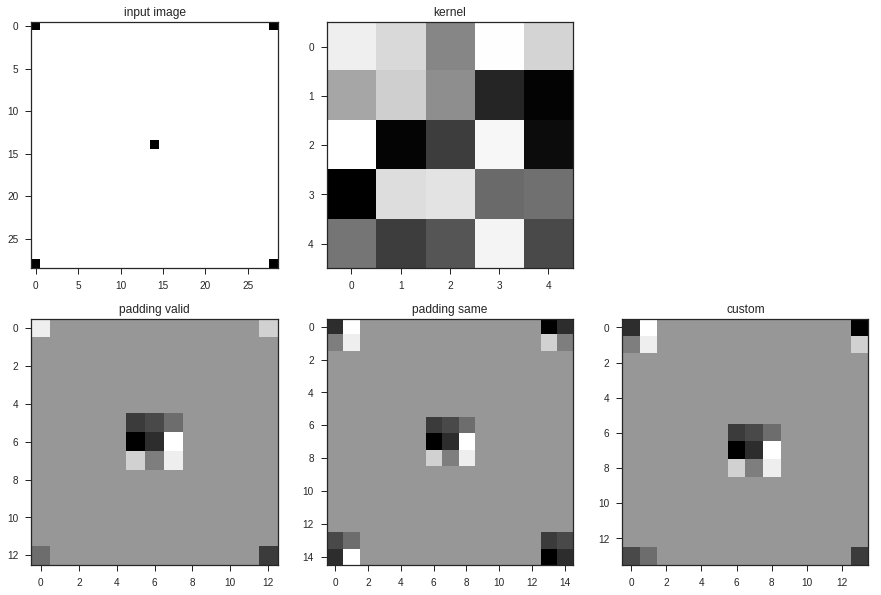

In [9]:
plt.figure(figsize=(15,10))
im = 0.0 * train_images[0, :, :, 0]
im[0, 0] = 1.0
im[im.shape[0] // 2, im.shape[1] // 2] = 1.0
im[-1, -1] = 1.0
im[0, -1] = 1.0
im[-1, 0] = 1.0
plt.subplot(231)
plt.imshow(im)
plt.title('input image')

plt.subplot(232)
plt.imshow(valid_model.get_weights()[0][:,:,0,0])
plt.title('kernel')

valid_pred = valid_model.predict(im[np.newaxis, :, :, np.newaxis])[0, :, :, 0]
plt.subplot(234)
plt.imshow(valid_pred)
plt.title('padding valid')

same_pred = same_model.predict(im[np.newaxis, :, :, np.newaxis])[0, :, :, 0]
plt.subplot(235)
plt.imshow(same_pred)
plt.title('padding same')

my_pred = my_model.predict(im[np.newaxis, :, :, np.newaxis])[0, :, :, 0]
plt.subplot(236)
plt.imshow(my_pred)
plt.title('custom')

None